# Outlier Detection

* An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining

* An Outlier is a rare chance of occurrence within a given data set. In Data Science, an Outlier is an observation point that is distant from other observations. An Outlier may be due to variability in the measurement or it may indicate experimental error.

* Outliers in data can distort predictions and affect the accuracy, if you don’t detect and handle them.

* Statisticians have accordingly developed numerous algorithms for the detection and treatment of outliers, but most of these methods were developed for univariate data sets.
     1. A **univariate outlier** is a data point that consists of an extreme value on one variable. Some of the Univariate Outlier Detection Techniques popularly used are “The Box Plot Rule”, Grubbs Test.
     2. A **multivariate outlier** is a combination of unusual scores on at least two variables. Some of the Multivariate Outlier Detection Techniques popularly used are the Mahalanobis Distance, Cook’s Distance, etc.

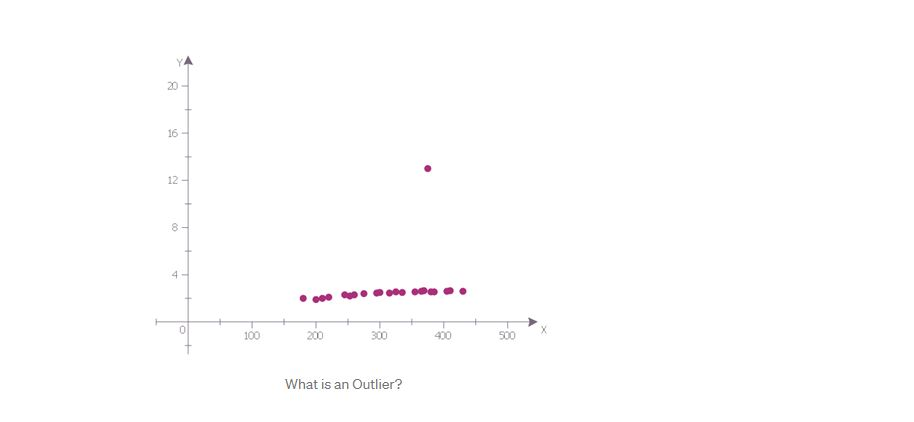

# some applications includes

1. Fraud detection (credit cards, click fraud,..)
2. Network failure detection
3. Intrusion detection in networks
4. Defect detection (engineering etc...)
5. News? Intelligence?

# Illustrating with the Make_blobs datasets

In [5]:
import warnings
warnings.simplefilter('ignore', (FutureWarning, DeprecationWarning))

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['savefig.dpi']=300
plt.rcParams['savefig.bbox'] ='tight'
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
pd.set_option('precision', 3)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

Text(0.5, 0.98, 'Outlier Detection')

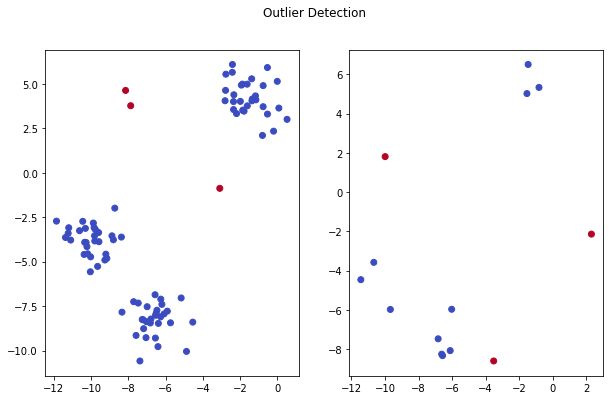

In [66]:
from sklearn.datasets import make_blobs
fig, ax = plt.subplots(1,2, figsize=(10,6))
X, y = make_blobs(random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=0)
rng = np.random.RandomState(5)
X_train_noise = np.vstack([X_train, rng.uniform(X_train.min(), X_train.max(), size=(3,2))])
y_train_noise = np.hstack([np.zeros_like(y_train), [1,1,1]])
ax[0].scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=y_train_noise, cmap=plt.cm.coolwarm)
X_test_noise = np.vstack([X_test, rng.uniform(X_test.min(), X_test.max(), size=(4, 2))])
y_test_noise = np.hstack([np.zeros_like(y_test), [1, 0, 1, 1, 1]])
ax[1].scatter(X_test_noise[:, 0], X_test_noise[:, 1], c=y_test_noise[:-1], cmap=plt.cm.coolwarm)
plt.suptitle("Outlier Detection")

 We could see some datapoints in the above visualization that doesn't agree with the other ones

# Using The Elliptic Envelope

In [23]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(X)
pred = ee.predict(X)
print(pred)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1 -1  1 -1]


In [25]:
print(np.mean(pred==-1))
print('10% of the data are outliers')

0.1
10% of the data are outliers


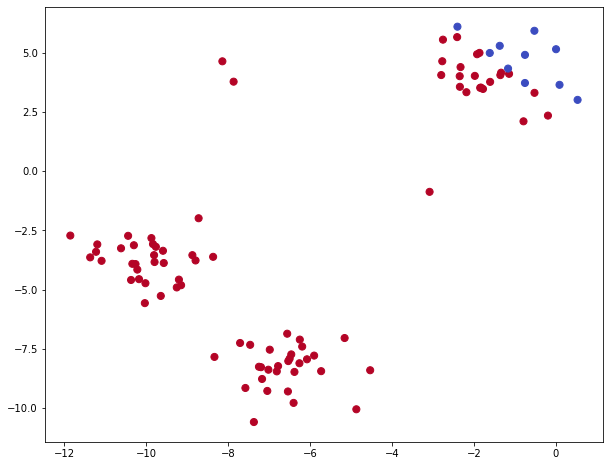

In [76]:
from sklearn.covariance import EllipticEnvelope
plt.figure(figsize=(10,8))
ee = EllipticEnvelope(contamination=.1).fit(X_train_noise)
pred = ee.predict(X_train_noise)
plt.scatter(X_train_noise[:,0], X_train_noise[:,1],s=50, c=pred, cmap=plt.cm.coolwarm)

# Using Kernel Density
Often shortened to KDE, it's a technique that let's you create a smooth curve given a set of data. ... This can be useful if you want to visualize just the “shape” of some data, as a kind of continuous replacement for the discrete histogram.

(-6.0, -2.0)

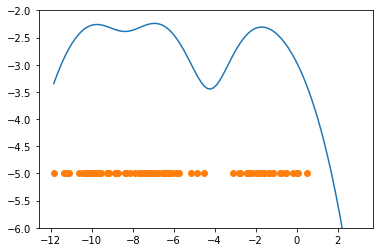

In [87]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity().fit(X_train_noise[:, :1])

line = np.linspace(X_train_noise.min(), 3, 100)
line_density = kde.score_samples(line[:, np.newaxis])

plt.plot(line, line_density)
plt.plot(X_train_noise[:, 0], -5 * np.ones(X_train_noise.shape[0]), 'o')
xlim = plt.xlim()
ylim = plt.ylim()
plt.ylim(-6, -2)

In [82]:
kde = KernelDensity(bandwidth=3)
kde.fit(X_train_noise)
pred = kde.score_samples(X_train_noise)
pred = (pred > np.percentile(pred, 10)).astype(int)

xs = np.linspace(xlim[0], xlim[1], 100)
ys = np.linspace(ylim[0], ylim[1], 100)
xx, yy = np.meshgrid(xs, ys)
dec = kde.score_samples(np.c_[xx.ravel(), yy.ravel()])

plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
pred = kde.score_samples(X_train_noise)
pred = (pred > np.percentile(pred, 10)).astype(int)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1])



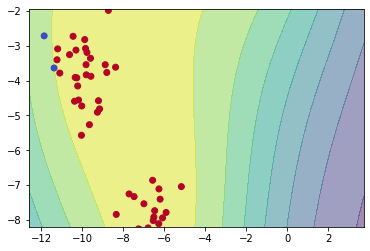

In [101]:
from sklearn.svm import OneClassSVM
scaler = StandardScaler()
X_train_noise_scaled = scaler.fit_transform(X_train_noise)
oneclass = OneClassSVM(nu=.1).fit(X_train_noise_scaled)
pred = oneclass.predict(X_train_noise_scaled).astype(np.int)

dec = oneclass.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=pred, cmap=plt.cm.coolwarm)

# IsolationForest

Isolation forest works on the principle of the decision tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [102]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest().fit(X_train_noise)
pred = iso.predict(X_train_noise)

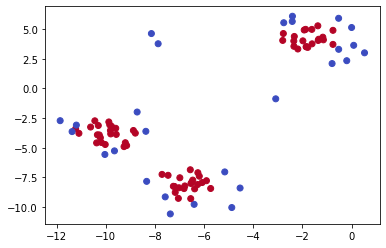

In [104]:
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=pred, cmap=plt.cm.coolwarm)
xlim = plt.xlim()
ylim = plt.ylim()

In [105]:
xs = np.linspace(xlim[0], xlim[1], 100)
ys = np.linspace(ylim[0], ylim[1], 100)
xx, yy = np.meshgrid(xs, ys)
dec = iso.decision_function(np.c_[xx.ravel(), yy.ravel()])

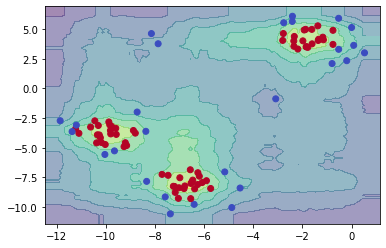

In [108]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1],c=pred, cmap=plt.cm.coolwarm)
